## Laboratórios 5 a 7
## Determinação do metal contido em uma amostra - Ensaio de Tração

### ASTM Standard E8/E8M

In [21]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [22]:
ensaio1 = pd.read_csv('acoAF1.csv', encoding = "ISO-8859-1")
ensaio2 = pd.read_csv('acoAF2.csv', encoding = "ISO-8859-1")

## Área da seção transversal dos corpos de prova (mm^2):

In [23]:
area = 58.088

In [24]:
ensaio1.head()

,Position (mm),Force (N),Strain (%),Time (min)
0,0.0000,3.33,-0.119,0.00274
1,0.0400,30.00,-0.114,0.00709
2,0.0520,30.00,-0.112,0.01140
3,0.0560,31.70,-0.111,0.01570
4,0.0608,31.70,-0.111,0.02000


In [25]:
ensaio1['Strain (%)'][0]

-0.11900000000000001

## Inserção da coluna com o valor da tensão (MPa):

In [26]:
ensaio1.insert(4,'Tensão',ensaio1["Force (N)"]/area) 
ensaio1.insert(5, 'strain(%)', ensaio1['Strain (%)'] - ensaio1['Strain (%)'][0])
ensaio2.insert(4,'Tensão',ensaio2["Force (N)"]/area)

## Inserção da coluna com o valor da deformação absoluta

In [27]:
ensaio1.insert(5, 'Abs Strain', ensaio1['strain(%)']/100)
ensaio2.insert(5, 'Abs Strain', ensaio2['Strain (%)']/100)

In [28]:
ensaio1.head()

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Abs Strain,strain(%)
0,0.0000,3.33,-0.119,0.00274,0.057327,0.00000,0.000
1,0.0400,30.00,-0.114,0.00709,0.516458,0.00005,0.005
2,0.0520,30.00,-0.112,0.01140,0.516458,0.00007,0.007
3,0.0560,31.70,-0.111,0.01570,0.545724,0.00008,0.008
4,0.0608,31.70,-0.111,0.02000,0.545724,0.00008,0.008


In [29]:
regiao_linear_y1 = [ensaio1['Tensão'][i] for i in range(100,500)]
regiao_linear_x1 = [ensaio1['Abs Strain'][i] for i in range(100,500)]

slope1, intercept = np.polyfit(regiao_linear_x1, regiao_linear_y1, 1)
print('Primeiro ensaio:', slope1)

regiao_linear_y2 = [ensaio2['Tensão'][i] for i in range(100,500)]
regiao_linear_x2 = [ensaio2['Abs Strain'][i] for i in range(100,500)]

slope2, intercept = np.polyfit(regiao_linear_x2, regiao_linear_y2, 1)
print('Segundo ensaio:', slope2)

Primeiro ensaio: 216638.292152
Segundo ensaio: 223748.806636


In [30]:
ensaio1[ensaio1['Abs Strain'] == 0.002].index.tolist()
#encontrando em que linha está o valor de deformação de 0,2%

[595]

In [31]:
ensaio1[595:596]

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Abs Strain,strain(%)
595,2.6,15300.0,0.081,2.56,263.393472,0.002,0.2


### Módulo de Young: inclinação da região linear (regime elástico)

216638.292152
223748.806636


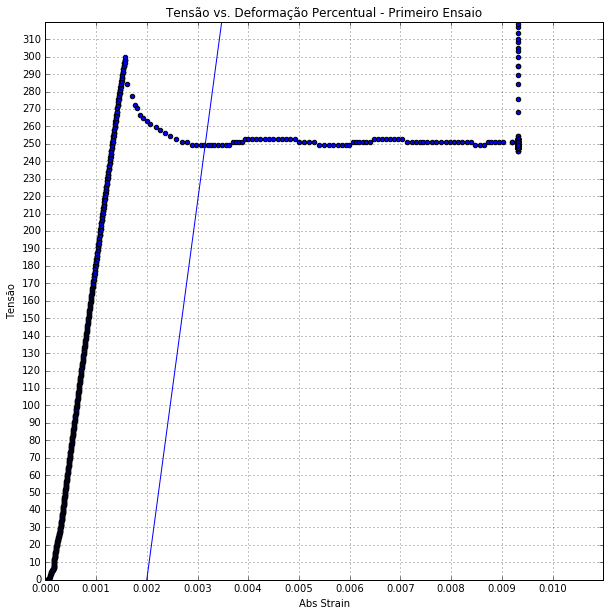

In [32]:
ensaio1.plot(kind='scatter', x='Abs Strain', y='Tensão', figsize=(10,10))
plt.axis([0,0.0110,0,320])
plt.title('Tensão vs. Deformação Percentual - Primeiro Ensaio')
plt.xticks(np.arange(0, 0.0110, 0.001))
plt.yticks(np.arange(0, 320, 10))
plt.grid()

x_min1, x_max1 = 0.002,0.008
y_min1, y_max1 = 0, slope1*(x_max1-x_min1)
plt.plot([x_min1, x_max1], [y_min1, y_max1])

regiao_linear_y1 = [ensaio1['Tensão'][i] for i in range(100,500)]
regiao_linear_x1 = [ensaio1['Abs Strain'][i] for i in range(100,500)]

slope1, intercept = np.polyfit(regiao_linear_x1, regiao_linear_y1, 1)
print(slope1)

regiao_linear_y2 = [ensaio2['Tensão'][i] for i in range(100,500)]
regiao_linear_x2 = [ensaio2['Abs Strain'][i] for i in range(100,500)]

slope2, intercept = np.polyfit(regiao_linear_x2, regiao_linear_y2, 1)
print(slope2)

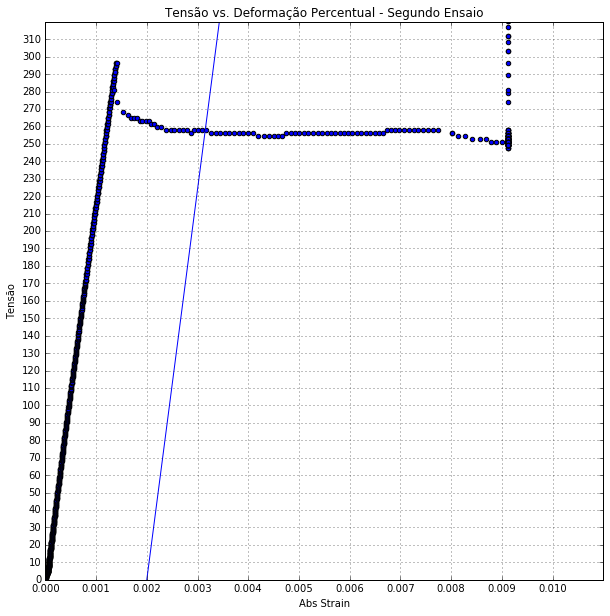

In [33]:
ensaio2.plot(kind='scatter', x='Abs Strain', y='Tensão', figsize=(10,10))
plt.axis([0,0.0110,0,320])
plt.title('Tensão vs. Deformação Percentual - Segundo Ensaio')
plt.yticks(np.arange(0, 320, 10))
plt.xticks(np.arange(0, 0.0110, 0.001))
plt.grid()

x_min2, x_max2 = 0.002,0.008
y_min2, y_max2 = 0, slope2*(x_max2-x_min2)
plt.plot([x_min2, x_max2], [y_min2, y_max2])

Os módulos de Young são de 216,64 GPa para o primeiro ensaio e de 223,75 GPa para o segundo ensaio.

## Determinação do limite de escoamento

Observamos, pelo gráfico, que o limite de escoamento pelo padrão ASTM Standard E8/E8M se encontra entre as deformações absolutas de 0.003 e 0.004.
Sendo assim, basta verificar no dataframe os valores da tensão para estes valores de deformação absoluta.

In [61]:
ensaio1[606:625]

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Abs Strain,strain(%)
606,2.65,14500.0,0.187,2.61,249.621264,0.00306,0.306
607,2.66,14500.0,0.194,2.62,249.621264,0.00313,0.313
608,2.66,14500.0,0.201,2.62,249.621264,0.00320,0.320
609,2.66,14500.0,0.208,2.62,249.621264,0.00327,0.327
610,2.67,14500.0,0.214,2.63,249.621264,0.00333,0.333
611,2.67,14500.0,0.221,2.63,249.621264,0.00340,0.340
612,2.68,14500.0,0.229,2.64,249.621264,0.00348,0.348
613,2.68,14500.0,0.237,2.64,249.621264,0.00356,0.356
614,2.69,14500.0,0.244,2.65,249.621264,0.00363,0.363
615,2.69,14600.0,0.251,2.65,251.342790,0.00370,0.370


In [69]:
ensaio2[686:698]

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Abs Strain
686,3.39,15000.0,0.301,3.37,258.228894,0.00301
687,3.40,15000.0,0.308,3.38,258.228894,0.00308
688,3.40,15000.0,0.317,3.38,258.228894,0.00317
689,3.41,14900.0,0.327,3.39,256.507368,0.00327
690,3.41,14900.0,0.336,3.39,256.507368,0.00336
691,3.42,14900.0,0.345,3.40,256.507368,0.00345
692,3.42,14900.0,0.354,3.40,256.507368,0.00354
693,3.43,14900.0,0.363,3.41,256.507368,0.00363
694,3.43,14900.0,0.371,3.41,256.507368,0.00371
695,3.44,14900.0,0.381,3.42,256.507368,0.00381


## Resultados

Consultando ambos os dataframes e os gráficos, pode-se cocluir que o limite de escoamento é de 249.62 MPa para o primeiro ensaio e 
258.22 MPa para o segundo ensaio.